Title: Developing a Convolutional Neural Network for Age Detection in Facial Images

Author: Tai Nyirenda

Date: 28/12/2023

# Introduction

This report focuses on the Building a Convolutional Neural Network (CNN) that classifies images for age detecion between three categories of Middle, Young and Old.  The dataset contains 19,906 images of faces fitting into these classes with the CNN model used in this report.



To achieve the goals of this analysis, this notebook is split into 5 major parts with the first part focused on: Loading & Visualizing the image dataset, the second focused on: Data Modelling, third part focused on: training and Model Building, the fourth part: focused on: Model Evaluation and the final part: Model Deployment

**Importing libary packages that may be needed:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from keras import layers, models
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import glob
from glob import glob
import os


print("Tensorflow: v{}".format(tf.__version__))
%matplotlib inline


Tensorflow: v2.15.0


# Visualizing the Dataset with EDA

**Loading dataset from local file directory for facial images that will be used and previewing 10 images:**

In [3]:
data = pd.read_csv('train.csv')
data.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [4]:
# Displaying Classes in dataset
data['Class'].unique()

array(['MIDDLE', 'YOUNG', 'OLD'], dtype=object)

In [5]:
data['Class'].value_counts()

Class
MIDDLE    10804
YOUNG      6706
OLD        2396
Name: count, dtype: int64

C:\Users\taies\AppData\Local\Temp\ipykernel_20680\58283727.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


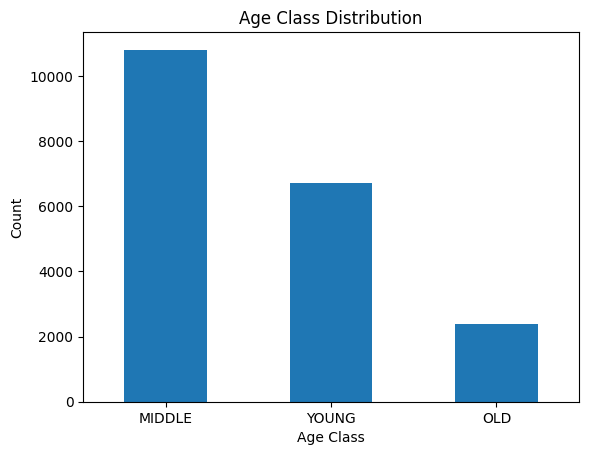

In [6]:
# Visualising the count of diagnosis using a bar plot
LABELS = ["MIDDLE", "YOUNG", "OLD"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Age Class Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Age Class")
plt.ylabel("Count");

In [7]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


colors = ['#004B87', 'LightBlue']
labels = ['MIDDLE', 'YOUNG', 'OLD']
values = data['Class'].value_counts() / data['Class'].shape[0]
total_normal = data[data['Class'] == False].shape[0]
total_fraudulent = data[data['Class'] == True].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=0.1)))

fig.update_layout(
    title_text='<b>Age Classes</b>',
    title_font_color='black',
    title_font=dict(size=24),
    legend_title_font_color='black',
    paper_bgcolor='white',
    plot_bgcolor='white',
    font_color='black',
)

Loading a sample image from the image faces dataset/directory:

In [8]:
image_path = 'C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train/*.jpg'

def load_sample(image_path, label):
    # loading the file into PIL Image
    image = Image.open(image_path)
    # Converting PIL Image to numpy array
    image = np.array(image)
    # Normalising pixel values to be between 0 and 1
    image = image / 255.0
    return image, label

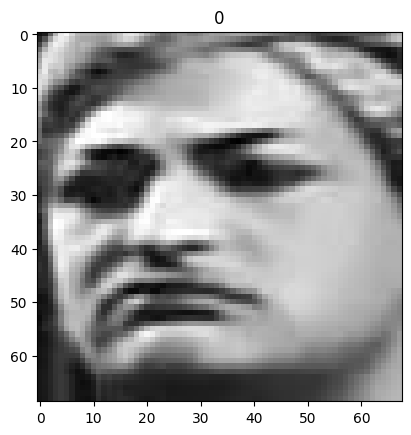

In [9]:
image, label = load_sample('C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train/0.jpg', 0)
fig, ax = plt.subplots()
ax.imshow(image)
ax.set_title(label)
plt.show()

In [10]:
# Initializing image paths variables.
image_path_pattern = 'C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train/*.jpg'

# List of all image file paths
image_paths = glob(image_path_pattern)

# Display the first few image paths for verification
print("First few image paths:")
print(image_paths[:10])

First few image paths:
['C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train\\0.jpg', 'C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train\\1.jpg', 'C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train\\100.jpg', 'C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train\\10000.jpg', 'C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train\\10001.jpg', 'C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train\\10004.jpg', 'C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train\\10007.jpg', 'C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train\\10008.jpg', 'C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train\\10009.jpg', 'C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep

Loading images from directory of facial images:

In [11]:
def readImage(path,ch = 3, resize=(150,150)):
	img = tf.io.read_file(path)
	img = tf.image.decode_jpeg(img, channels=ch)
	img = tf.image.convert_image_dtype(img, dtype=tf.float32)
	img = tf.image.resize(img, resize)
	return img

In [12]:
def load_data(image_path, label):
    image = readImage(image_path, 3, (150,150))
    return (image, label)

In [13]:
# Building the list of image paths and list of respective labels of the images
PATH = "C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train"
image_paths = []
for path in os.listdir(PATH):
    image_paths.append(PATH+"/"+path)
print(len(image_paths))

labels_list = []

for i in image_paths:
    _,tail = os.path.split(i)
    label = data.loc[data['ID'] == tail]['Class'].values[0]
    labels_list.append(label)
print(len(labels_list))

19906


19906


Previewing images with respective labels:

Label: b'MIDDLE'


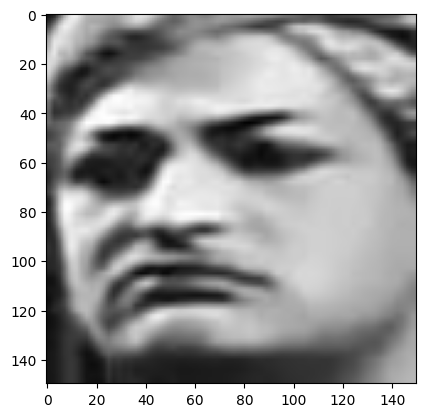

Label: b'OLD'


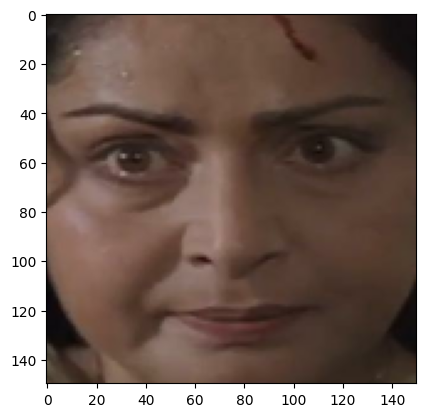

Label: b'MIDDLE'


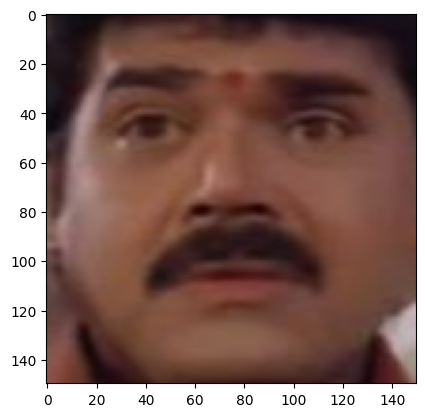

Label: b'MIDDLE'


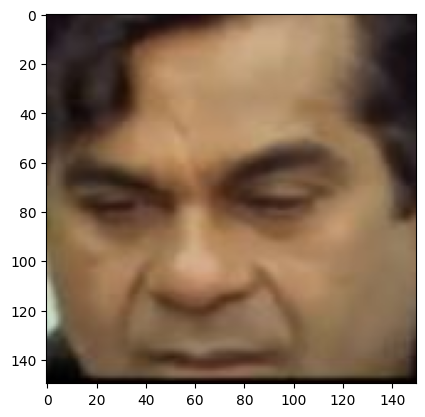

Label: b'YOUNG'


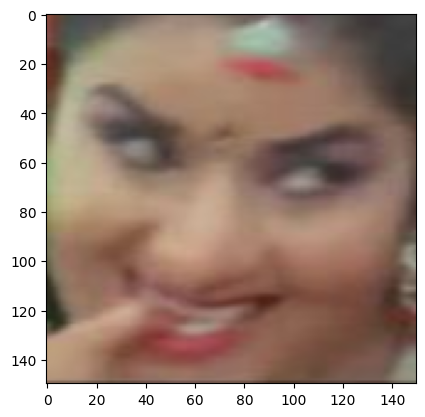

Label: b'MIDDLE'


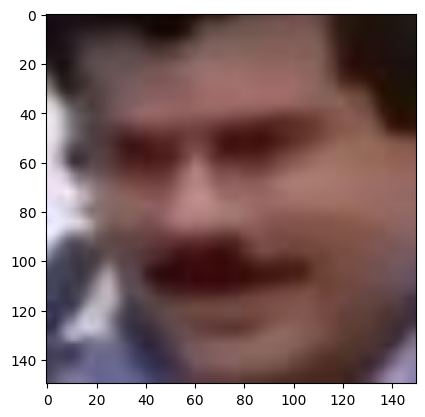

Label: b'YOUNG'


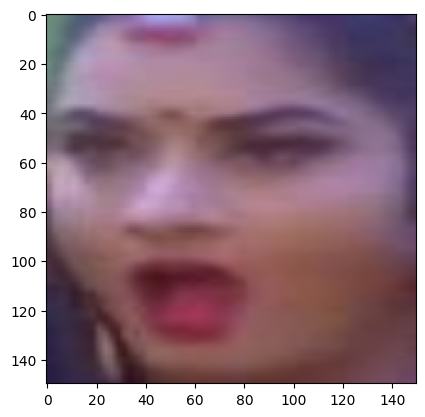

Label: b'YOUNG'


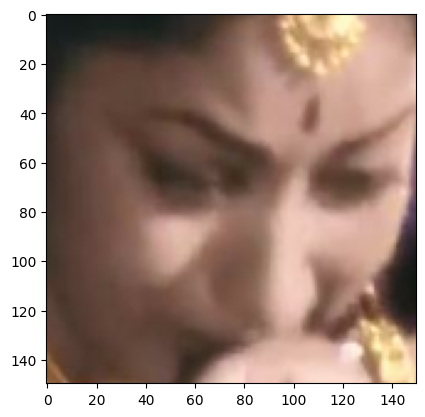

Label: b'YOUNG'


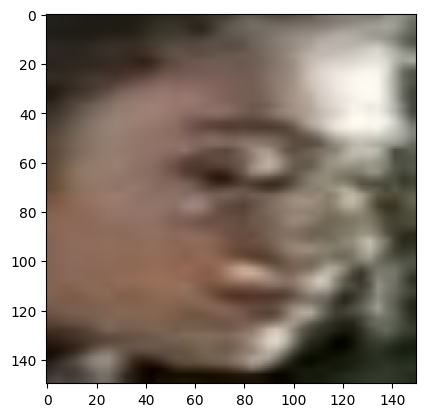

Label: b'OLD'


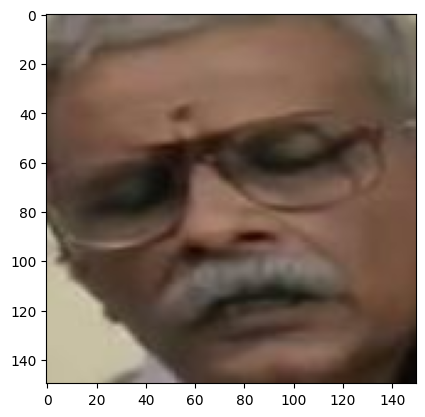

In [14]:
# Creating a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels_list))
dataset = dataset.map(load_data)

# Displaying the first 10 images and labels
count = 0
for image, label in dataset.take(10).as_numpy_iterator():
    print(f"Label: {label}")
    plt.imshow(image)
    plt.show()
    count += 1

In [15]:
# Converting string labels to integer labels in preparation for model activation function input
label_mapping = {'MIDDLE': 0, 'YOUNG': 1, 'OLD': 2}
labels_list = [label_mapping[label] for label in labels_list]


# Train/Test Split

Train/Test split of 80/20:

In [ ]:
# Splitting the dataset into train and test dataset
train_size = int(0.8*(len(image_paths)))
print(train_size)
test_size = int(0.2*(len(image_paths)))
print(test_size)

train_set = tf.data.Dataset.from_tensor_slices((image_paths[:train_size], labels_list[:train_size]))
test_set = tf.data.Dataset.from_tensor_slices((image_paths[test_size:], labels_list[test_size:]))

15924


Loading and processing each element of the dataset and batching images to be processed simultaneously (to improve training accuracy) with prefetch batching (to improve loading and training time/ model perfromance) which will help efficient processing during model evaluation:

In [ ]:
train_set = (train_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
test_set = (test_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

# Model Building

In this code, we define a simple CNN model with several convolutional layers followed by max-pooling layers, and then fully connected layers for classification. The final layer uses softmax activation and a loss function of sparse categorical crossentropy.  CNN is designed for image classification into three age categories using three Convolutional layers followed by fully connected layers. The model uses ReLU activations for feature extraction and softmax activation for the final classification.

The first layer is a Convolutional layer with 32 filters, each of size (3, 3), using the ReLU activation function. It takes input images with a shape of (150, 150, 3), where 3 is the number of color channels (RGB). This layer is followed by a MaxPooling layer with a pool size of (2, 2), which reduces the spatial dimensions.

The next 2 layers are another convolutional layer with 64 filters and a (3, 3) kernel, followed by a MaxPooling layer.

Following is another onvolutional layer with 128 filters and a (3, 3) kernel, followed by MaxPooling.

The flattening layer flattens the output from the previous layers into a 1D array, preparing it for the Dense layers.

Subsequently, two Dense layers follow the flattened layer. The first Dense layer has 512 neurons with ReLU activation, and the final Dense layer has 3 neurons (for the three age categories) with a softmax activation function. Softmax is used for multi-class classification, converting the output into probability scores for each class.

The model compilation consists of the Adam optimizer, sparse categorical crossentropy as the loss function (suitable for multi-class classification tasks where the labels are integers), and accuracy as the evaluation metric.

In [ ]:
# Defining the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) # activation function set on basis of classifying 3 categories of age

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # loss function set based on classification task
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 26, 26, 128)     

**Train Dataset Model Run:**

In [ ]:
def create_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten layer
        layers.Flatten(),

        # Dense layers
        layers.Dense(512, activation='relu'),
        layers.Dense(3, activation='softmax') # activation function set on basis of classifying 3 categories of age
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # loss function set based on classification task
                  metrics=['accuracy'])

    return model

# Create an instance of the model
model = create_model()

# Train the model with the specified steps_per_epoch
history = model.fit(train_set, epochs=10)  

Epoch 1/10
498/498 [==============================] - 260s 517ms/step - loss: 0.8491 - accuracy: 0.6194
Epoch 2/10
498/498 [==============================] - 196s 393ms/step - loss: 0.7316 - accuracy: 0.6781
Epoch 3/10
498/498 [==============================] - 181s 363ms/step - loss: 0.6598 - accuracy: 0.7157
Epoch 4/10
498/498 [==============================] - 195s 392ms/step - loss: 0.5777 - accuracy: 0.7577
Epoch 5/10
498/498 [==============================] - 197s 396ms/step - loss: 0.4764 - accuracy: 0.8055
Epoch 6/10
498/498 [==============================] - 186s 373ms/step - loss: 0.3733 - accuracy: 0.8537
Epoch 7/10
498/498 [==============================] - 219s 440ms/step - loss: 0.2824 - accuracy: 0.8899
Epoch 8/10
498/498 [==============================] - 227s 455ms/step - loss: 0.2113 - accuracy: 0.9214
Epoch 9/10
498/498 [==============================] - 235s 471ms/step - loss: 0.1536 - accuracy: 0.9439
Epoch 10/10
498/498 [==============================] - 278s 558m

In [ ]:
# Model evaluation
loss, accuracy = model.evaluate(train_set)
print("Loss:", loss)
print("Accuracy:", accuracy)

498/498 [==============================] - 87s 171ms/step - loss: 0.1975 - accuracy: 0.9324
Loss: 0.19751155376434326
Accuracy: 0.9323662519454956


**Test Dataset Model Run:**

In [ ]:
def create_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten layer
        layers.Flatten(),

        # Dense layers
        layers.Dense(512, activation='relu'),
        layers.Dense(3, activation='softmax') # activation function set on basis of classifying 3 categories of age
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # loss function set based on classification task
                  metrics=['accuracy'])

    return model

# Create an instance of the model
model = create_model()

# Train the model with the specified steps_per_epoch
history = model.fit(test_set, epochs=10)  

Epoch 1/10
498/498 [==============================] - 239s 474ms/step - loss: 0.8373 - accuracy: 0.6205
Epoch 2/10
498/498 [==============================] - 253s 507ms/step - loss: 0.7302 - accuracy: 0.6843
Epoch 3/10
498/498 [==============================] - 221s 444ms/step - loss: 0.6507 - accuracy: 0.7245
Epoch 4/10
498/498 [==============================] - 181s 364ms/step - loss: 0.5421 - accuracy: 0.7744
Epoch 5/10
498/498 [==============================] - 176s 354ms/step - loss: 0.4233 - accuracy: 0.8276
Epoch 6/10
498/498 [==============================] - 180s 361ms/step - loss: 0.3103 - accuracy: 0.8772
Epoch 7/10
498/498 [==============================] - 174s 349ms/step - loss: 0.2531 - accuracy: 0.9041
Epoch 8/10
498/498 [==============================] - 175s 352ms/step - loss: 0.1790 - accuracy: 0.9321
Epoch 9/10
498/498 [==============================] - 177s 354ms/step - loss: 0.1330 - accuracy: 0.9525
Epoch 10/10
498/498 [==============================] - 208s 417m

In [ ]:
# Model evaluation
loss, accuracy = model.evaluate(test_set)
print("Loss:", loss)
print("Accuracy:", accuracy)

498/498 [==============================] - 68s 134ms/step - loss: 0.2106 - accuracy: 0.9267
Loss: 0.21056142449378967
Accuracy: 0.926656186580658


In [ ]:
# Obtaining true labels from the test set
true_labels = np.concatenate([label.numpy() for _, label in test_set])

# Obtaining predictions from the model
predictions = model.predict(test_set)

# Converting predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculating precision, recall, F1-score, and accuracy
report = classification_report(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
confusion_mat = confusion_matrix(true_labels, predicted_labels)

print("Classification Report:\n", report)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

498/498 [==============================] - 78s 155ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      8627
           1       0.94      0.90      0.92      5370
           2       0.94      0.85      0.89      1928

    accuracy                           0.93     15925
   macro avg       0.93      0.90      0.92     15925
weighted avg       0.93      0.93      0.93     15925

Accuracy: 0.9266562009419153
Confusion Matrix:
 [[8304  247   76]
 [ 524 4816   30]
 [ 235   56 1637]]


# Model Evaluation

**Comparison of Model Accuracy over 10 Epochs with Train and Test datasets:**

Graph 1:

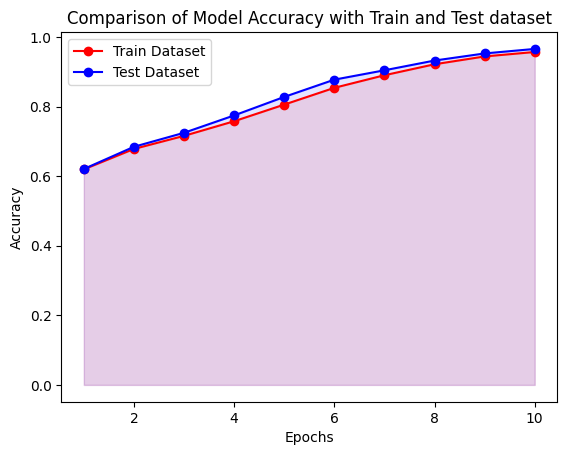

In [ ]:
# Accuracy values for both models
accuracy_with_train = [0.6194, 0.6781, 0.7157, 0.7577, 0.8055, 0.8537, 0.8899, 0.9214, 0.9439, 0.9567]
accuracy_with_test = [0.6205, 0.6843, 0.7245, 0.7744, 0.8276, 0.8772, 0.9041, 0.9321, 0.9525, 0.9655]

epochs = range(1, 11)

# Plot of accuracy comparison
plt.plot(epochs, accuracy_with_train, marker='o', linestyle='-', color='red', label='Train Dataset')
plt.plot(epochs, accuracy_with_test, marker='o', linestyle='-', color='blue', label='Test Dataset')

plt.fill_between(epochs, accuracy_with_train, color='red', alpha=0.1)  # Adding filled area for model with train dataset
plt.fill_between(epochs, accuracy_with_test, color='blue', alpha=0.1)  # Adding filled area for model with test dataset

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy with Train and Test dataset')
plt.legend()

plt.show()


Graph 2:

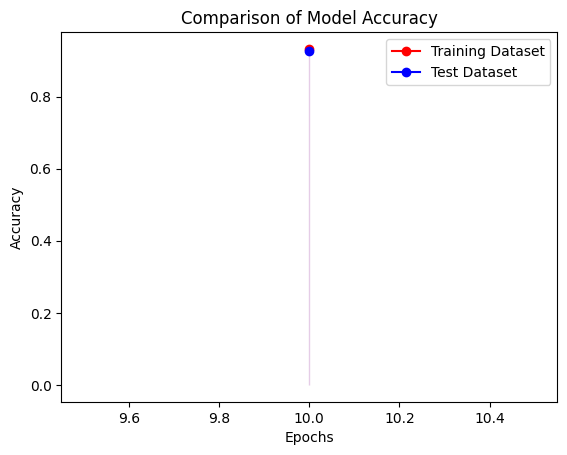

In [ ]:
# Final Accuracy values for both models
accuracy_with_train = [0.9323662519454956]
accuracy_with_test = [0.926656186580658]

epochs = epochs = range(10, len(accuracy_with_train) + 10)

# Plot of the accuracy comparison
plt.plot(epochs, accuracy_with_train, marker='o', linestyle='-', color='red', label='Training Dataset')
plt.plot(epochs, accuracy_with_test, marker='o', linestyle='-', color='blue', label='Test Dataset')

plt.fill_between(epochs, accuracy_with_train, color='red', alpha=0.1)  # Line fill
plt.fill_between(epochs, accuracy_with_test, color='blue', alpha=0.1)  # Line fill

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.legend()

plt.show()

# Conclusion

For the CNN model run, the model achieved a final accuracy of around 93% after 10 epochs with loss of 0.1975 on the training dataset. On  the test dataset, the model achived a final accuracy of 92% with loss of 0.2105.

The Train dataset accuracy reflects the performance of the model on the 80% of the data used for training after the final epoch in graph 2. The values increase over epochs, indicating that the model is learning the patterns from the training dataset well. In graph 1, it shows how well the model perfromed on the training set at each epoch during training. The increasing values indicate that the model is learning from the majority of the data.

The Test dataset accuracy reflects the accuracy on the separate 20% of the data not seen during training in graph 2. It shows how well the model generalizes to new, unseen data. The values generally increase, showing that the model is also generalizing well to unseen data as shown in graph 1. Furthermore, from the classification report it is shown that the model has high precision, recall, and F1-score for all three classes, indicating good performance. Overall accuracy is around 92.67%, which is the proportion of correctly classified instances among the total instances in the test set. The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class. From this, it can be concluded that the model seems to perform well on the test set, achieving good accuracy and balanced performance across different classes. This was performed only on the test set to validate further that the model generalises well on new and unseen data, rather than data it has already seen before and give and idea on the ability of the model to handle new instances.

In summary, the training and testing accuracies increase over epochs, which is an indication of good performance of the model. The overall accuracies are reasonably high, suggesting that the model is performing well on both the training and testing datasets. This indicates good generalization of the model when dealing with new data it has not seen before and good learning from the majority of data.


# Model Deployment (Anvil)

This Final Part focuses on the deployment of the created age detection model to Anvil, where it can be used as a web app.

In [ ]:
pip install anvil-uplink


     ---------------------------------------- 0.0/90.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/90.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/90.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/90.1 kB ? eta -:--:--
     ------------ ------------------------- 30.7/90.1 kB 262.6 kB/s eta 0:00:01
     ------------------------- ------------ 61.4/90.1 kB 365.7 kB/s eta 0:00:01
     -------------------------------------- 90.1/90.1 kB 427.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/840.9 kB ? eta -:--:--
     -------- ----------------------------- 194.6/840.9 kB 4.0 MB/s eta 0:00:01
     ----------------- -------------------- 389.1/840.9 kB 4.1 MB/s eta 0:00:01
     ----------------------------- -------- 645.1/840.9 kB 4.5 MB/s eta 0:00:01
     ------------------------------------ - 798.7/840.9 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 840.9/840.9 kB 3.8 MB/s eta 0:0


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Saving Pre-trained Model:

In [ ]:
model.save('C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning\Model')

INFO:tensorflow:Assets written to: C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning\Model\assets


INFO:tensorflow:Assets written to: C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning\Model\assets


Connecting notebook to Anvil using server uplink:

In [1]:
import anvil.server

anvil.server.connect("server_4OQRB6HIA3ZMU3PEZ4IF5UEY-SQXE3LAZNENGDZD7")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


Defining a callable function for image passed:

In [ ]:
import anvil.server
import anvil.media
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Loading pre-trained saved model
loaded_model = tf.keras.models.load_model('C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/Model')

# Callable function
@anvil.server.callable
def classify_image(file):
    # Ensuring the file is an image
    if not isinstance(file, anvil.Media):
        raise ValueError("Please upload an image file.")

    # Pull file content as bytes
    image_bytes = file.get_bytes()

    # Decode image bytes
    img = tf.image.decode_image(image_bytes, channels=3)
    img = tf.image.resize(img, (150, 150))
    img_array = tf.image.convert_image_dtype(img, dtype=tf.float32)
    img_array = tf.expand_dims(img_array, axis=0)

    # To perform image classification using the loaded model
    predictions = loaded_model.predict(img_array)

    # Obtain predicted class label
    class_label = np.argmax(predictions[0])

    # Map class label to category class ('middle', 'young', and 'old')
    class_categories = ['MIDDLE', 'YOUNG', 'OLD']
    predicted_category = class_categories[class_label]

    # Returns result to the Anvil app
    return predicted_category


Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-6 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 207, in heartbeat_until_reopened
    call("anvil.private.echo", "keep-alive")
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 408, in call
    return _do_call(args, kwargs, fn_name=fn_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 398, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
           ^^^^^^^^^^

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


Exception in thread Thread-9 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 408, in call
    return _do_call(args, kwargs, fn_name=fn_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 398, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\_threaded_server.py", line 435, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\P

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-12 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 408, in call
    return _do_call(args, kwargs, fn_name=fn_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 398, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\_threaded_server.py", line 435, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


Exception in thread Thread-15 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 408, in call
    return _do_call(args, kwargs, fn_name=fn_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 398, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\_threaded_server.py", line 435, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


Exception in thread Thread-18 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 408, in call
    return _do_call(args, kwargs, fn_name=fn_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 398, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\_threaded_server.py", line 435, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


Exception in thread Thread-21 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 408, in call
    return _do_call(args, kwargs, fn_name=fn_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 398, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\_threaded_server.py", line 435, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


Exception in thread Thread-24 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 207, in heartbeat_until_reopened
    call("anvil.private.echo", "keep-alive")
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 408, in call
    return _do_call(args, kwargs, fn_name=fn_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\anvil\server.py", line 398, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
           ^^^^^^^^^

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


## Anvil Code:

using notebook callable function with GUI design

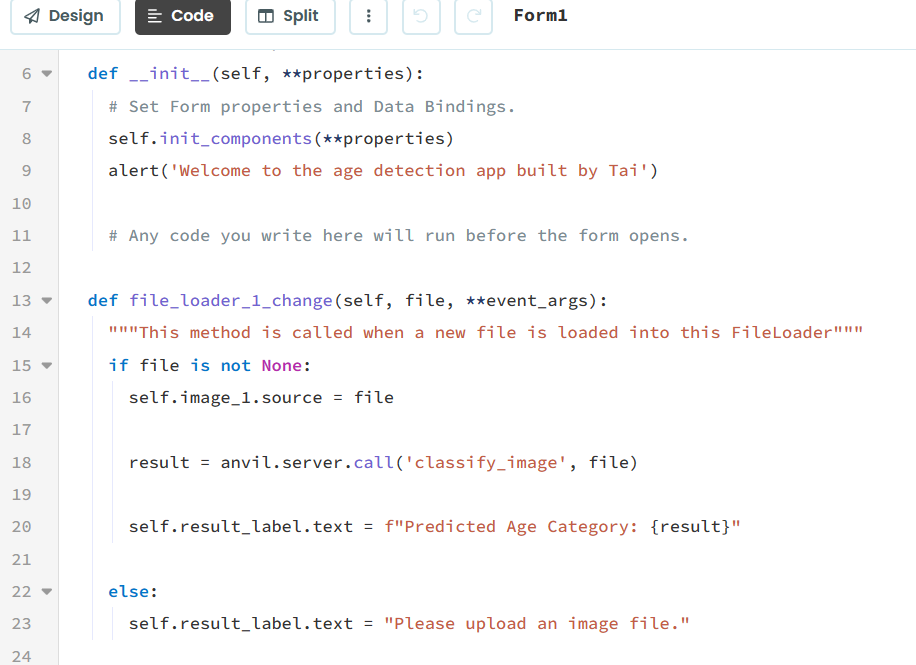

## Web App GUI:

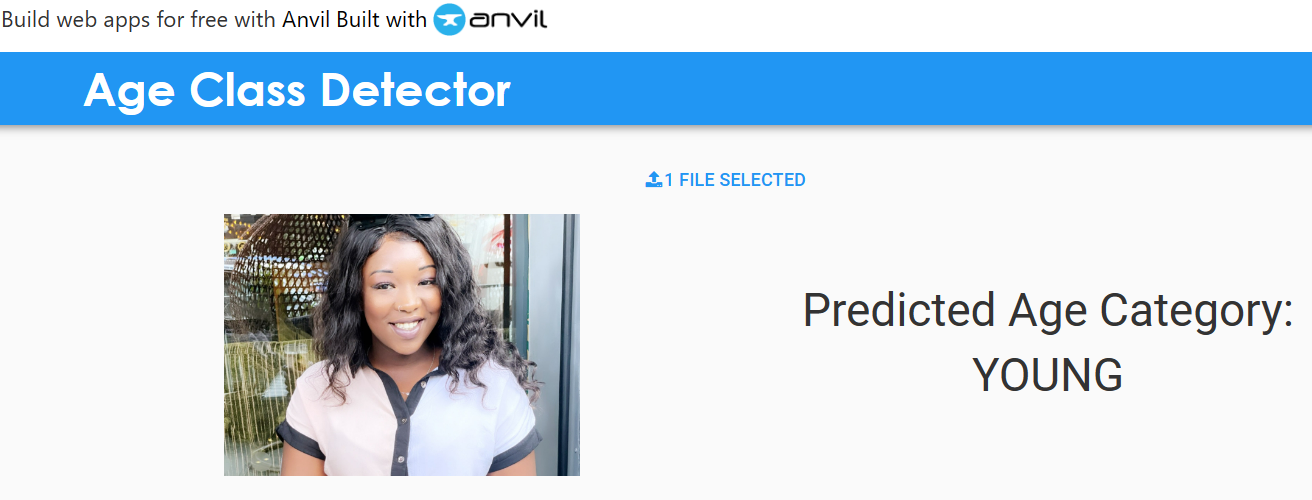

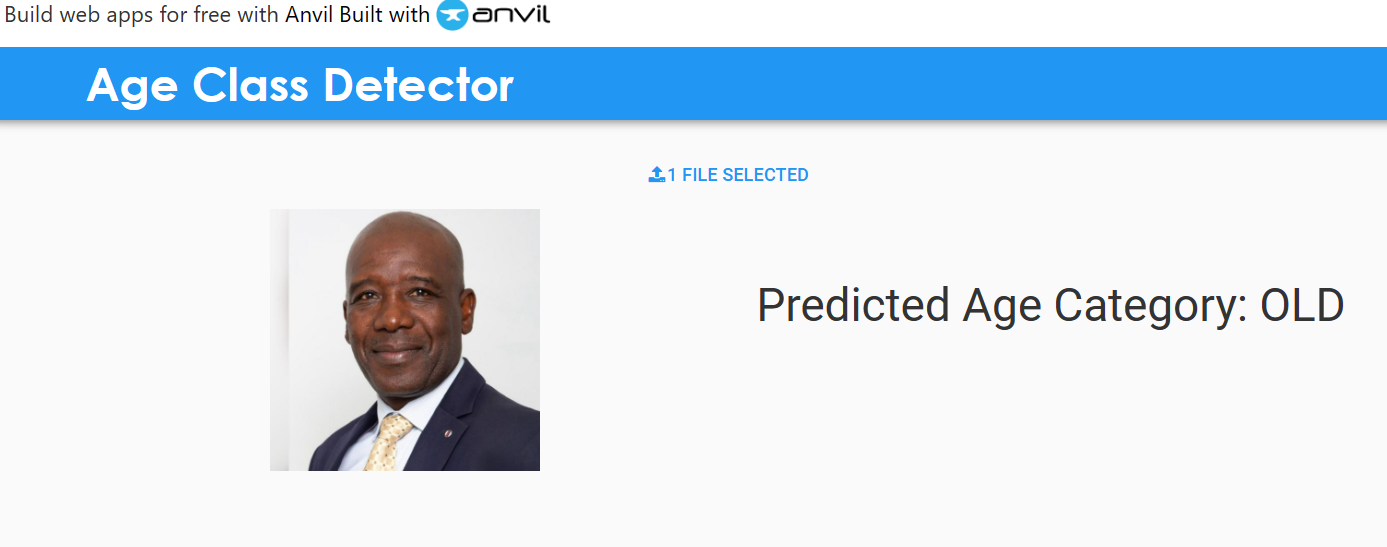

## Website: https://agedetectiongeneratortn.anvil.app/

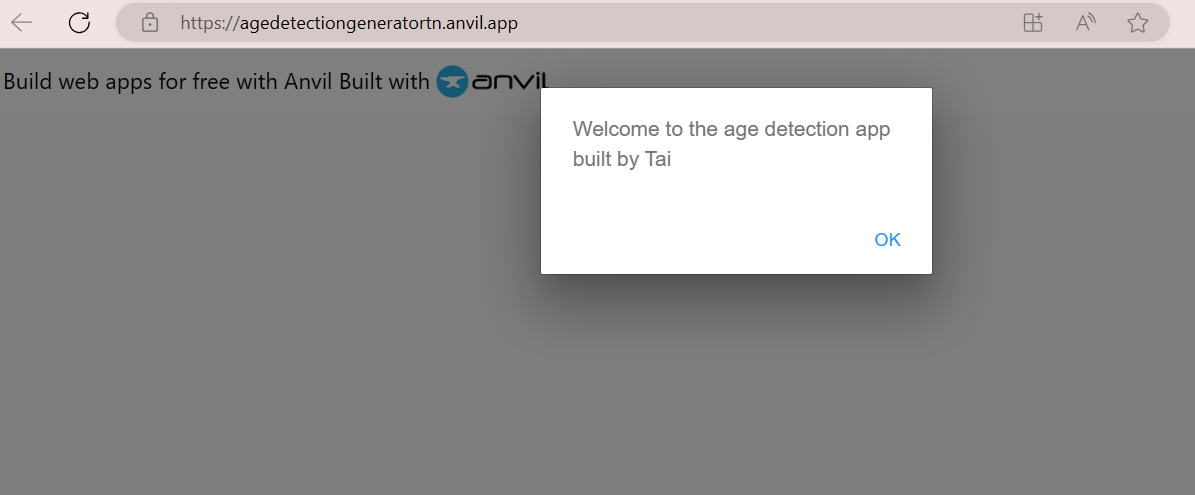

# Further Investigations

Here, the data will be augmented with some image preprocessing technique with the CNN model to investigate whether model accuracy can be improved:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from keras import layers, models
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import glob
from glob import glob
import os
from tensorflow.keras import regularizers

data = pd.read_csv('train.csv')

def readImage(path, ch=3, resize=(150, 150)):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=ch)
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)
    img = tf.image.resize(img, resize)
    return img

def augment_data(image, label):
    # Data augmentation operations
    #image = tf.image.random_crop(image, size=[150, 150, 3])
    #image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    #image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
    image = tf.image.random_hue(image, max_delta=0.5)

    return image, label


def load_data(image_path, label):
    image = readImage(image_path, 3, (150, 150))
    return (image, label)

#
# Building the list of image paths and list of respective labels of the images
PATH = "C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train"
image_paths = []
for path in os.listdir(PATH):
    image_paths.append(PATH+"/"+path)
print(len(image_paths))

labels_list = []

for i in image_paths:
    _,tail = os.path.split(i)
    label = data.loc[data['ID'] == tail]['Class'].values[0]
    labels_list.append(label)
print(len(labels_list))

# Converting string labels to integer labels in preparation for model activation function input
label_mapping = {'MIDDLE': 0, 'YOUNG': 1, 'OLD': 2}
labels_list = [label_mapping[label] for label in labels_list]

# Splitting the dataset into train and test dataset
train_size = int(0.8*(len(image_paths)))
print(train_size)
test_size = int(0.2*(len(image_paths)))
print(test_size)

train_set = tf.data.Dataset.from_tensor_slices((image_paths[:train_size], labels_list[:train_size]))
test_set = tf.data.Dataset.from_tensor_slices((image_paths[test_size:], labels_list[test_size:]))

# Creating a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels_list))
dataset = dataset.map(load_data)

# Augmenting the training set
augmented_train_set = (train_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .map(augment_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

# Defining model
def create_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten layer
        layers.Flatten(),

        # Dense layers
        layers.Dense(512, activation='relu'),
        layers.Dense(3, activation='softmax') # activation function set on basis of classifying 3 categories of age
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # loss function set based on classification task
                  metrics=['accuracy'])

    return model

# Create an instance of the model
model = create_model()

# Train the model with the specified steps_per_epoch
history = model.fit(augmented_train_set, epochs=10) 

# Model evaluation
loss, accuracy = model.evaluate(augmented_train_set)
print("Loss:", loss)
print("Accuracy:", accuracy)



19906
19906
15924
3981
Epoch 1/10
498/498 [==============================] - 193s 382ms/step - loss: 0.9145 - accuracy: 0.5758
Epoch 2/10
498/498 [==============================] - 203s 408ms/step - loss: 0.8447 - accuracy: 0.6154
Epoch 3/10
498/498 [==============================] - 211s 423ms/step - loss: 0.8043 - accuracy: 0.6318
Epoch 4/10
498/498 [==============================] - 203s 408ms/step - loss: 0.7848 - accuracy: 0.6493
Epoch 5/10
498/498 [==============================] - 249s 500ms/step - loss: 0.7508 - accuracy: 0.6731
Epoch 6/10
498/498 [==============================] - 262s 525ms/step - loss: 0.7187 - accuracy: 0.6882
Epoch 7/10
498/498 [==============================] - 240s 481ms/step - loss: 0.6725 - accuracy: 0.7118
Epoch 8/10
498/498 [==============================] - 195s 391ms/step - loss: 0.6101 - accuracy: 0.7460
Epoch 9/10
498/498 [==============================] - 206s 414ms/step - loss: 0.5371 - accuracy: 0.7812
Epoch 10/10
498/498 [====================

Here, the dataset will be experimented using bounding boxes around facial images to experiment possible face detection with the CNN model to investigate whether model accuracy can be improved:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from keras import layers, models
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import glob
from glob import glob
import os
from tensorflow.keras import regularizers
import cv2 

data = pd.read_csv('train.csv')

def readImage(path, ch=3, resize=(150, 150)):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=ch)
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)
    img = tf.image.resize(img, resize)
    return img

def detect_faces(image_path):
    image_path_str = str(image_path)

    # Read the image
    image = cv2.imread(image_path_str)

    # Check if the image is None or empty
    if image is None or image.size == 0:
        # Handle the case where the image is empty or not loaded
        print("Error: Unable to load or empty image at", image_path)
        return None

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the pre-trained Haarcascades face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Draw bounding boxes around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Return bounding box coordinates
    return [(x, y, w, h) for (x, y, w, h) in faces]


def load_data(image_path, label):
    # Detect faces and get bounding box coordinates
    bounding_boxes = detect_faces(image_path)

    # Load the image
    image = readImage(image_path, 3, (150, 150))

    return image, label, bounding_boxes

# Building the list of image paths and list of respective labels of the images
PATH = "C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train"
image_paths = []
for path in os.listdir(PATH):
    image_paths.append(PATH + "/" + path)
print(len(image_paths))

labels_list = []

for i in image_paths:
    _, tail = os.path.split(i)
    label = data.loc[data['ID'] == tail]['Class'].values[0]
    labels_list.append(label)
print(len(labels_list))

# Converting string labels to integer labels in preparation for model activation function input
label_mapping = {'MIDDLE': 0, 'YOUNG': 1, 'OLD': 2}
labels_list = [label_mapping[label] for label in labels_list]

# Splitting the dataset into train and test dataset
train_size = int(0.8*(len(image_paths)))
print(train_size)
test_size = int(0.2*(len(image_paths)))
print(test_size)

train_set = tf.data.Dataset.from_tensor_slices((image_paths[:train_size], labels_list[:train_size]))
test_set = tf.data.Dataset.from_tensor_slices((image_paths[test_size:], labels_list[test_size:]))

# Creating a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels_list))
dataset = dataset.map(load_data)

# Augmenting the training set
augmented_train_set = (train_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

# Defining model
def create_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten layer
        layers.Flatten(),

        # Dense layers
        layers.Dense(512, activation='relu'),
        layers.Dense(3, activation='softmax')  # activation function set on basis of classifying 3 categories of age
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # loss function set based on classification task
                  metrics=['accuracy'])

    return model

# Creating an instance of the model
model = create_model()

# Training the model with the specified steps_per_epoch
history = model.fit(augmented_train_set, epochs=10)

# Model evaluation
loss, accuracy = model.evaluate(augmented_train_set)
print("Loss:", loss)
print("Accuracy:", accuracy)


19906
19906
15924
3981
Error: Unable to load or empty image at Tensor("args_0:0", shape=(), dtype=string)
Error: Unable to load or empty image at Tensor("args_0:0", shape=(), dtype=string)
Epoch 1/10
498/498 [==============================] - 304s 601ms/step - loss: 0.8327 - accuracy: 0.6245
Epoch 2/10
498/498 [==============================] - 312s 626ms/step - loss: 0.7240 - accuracy: 0.6826
Epoch 3/10
498/498 [==============================] - 346s 696ms/step - loss: 0.6491 - accuracy: 0.7189
Epoch 4/10
498/498 [==============================] - 351s 704ms/step - loss: 0.5688 - accuracy: 0.7597
Epoch 5/10
498/498 [==============================] - 339s 682ms/step - loss: 0.4621 - accuracy: 0.8122
Epoch 6/10
498/498 [==============================] - 317s 637ms/step - loss: 0.3631 - accuracy: 0.8579
Epoch 7/10
498/498 [==============================] - 319s 641ms/step - loss: 0.2759 - accuracy: 0.8927
Epoch 8/10
498/498 [==============================] - 266s 534ms/step - loss: 0.210

In [32]:
model.save('C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning\Model 2')


INFO:tensorflow:Assets written to: C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning\Model 2\assets


INFO:tensorflow:Assets written to: C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning\Model 2\assets


Error: Unable to load or empty image at [[[23 23 29]
  [23 23 29]
  [22 22 28]
  ...
  [19 15 20]
  [19 15 20]
  [19 15 20]]

 [[23 23 29]
  [23 23 29]
  [22 22 28]
  ...
  [19 15 20]
  [19 15 20]
  [19 15 20]]

 [[23 23 29]
  [23 23 29]
  [22 22 28]
  ...
  [19 15 20]
  [19 15 20]
  [19 15 20]]

 ...

 [[56 68 86]
  [54 66 84]
  [50 63 79]
  ...
  [52 66 78]
  [51 67 79]
  [53 67 79]]

 [[62 73 93]
  [59 70 90]
  [54 66 84]
  ...
  [50 66 78]
  [51 67 79]
  [51 67 79]]

 [[67 78 98]
  [64 75 95]
  [58 70 88]
  ...
  [50 66 78]
  [51 67 79]
  [51 67 79]]]
Error: Unable to load or empty image at [[[ 40  50  68]
  [ 22  32  50]
  [ 14  21  40]
  ...
  [  4   3  13]
  [  4   3  13]
  [  4   3  13]]

 [[ 36  46  64]
  [ 26  36  54]
  [ 14  21  40]
  ...
  [  4   3  13]
  [  4   3  13]
  [  5   4  14]]

 [[ 30  40  58]
  [ 28  38  56]
  [ 16  23  42]
  ...
  [  6   5  15]
  [  5   4  14]
  [  5   4  14]]

 ...

 [[ 50  72  90]
  [ 52  74  92]
  [ 56  76  94]
  ...
  [123 133 143]
  [133 144

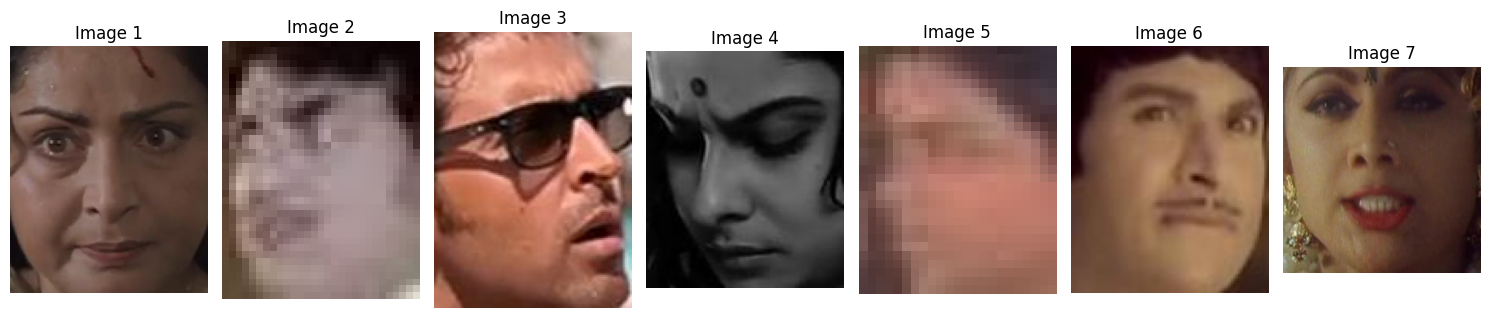

In [24]:
import cv2
import matplotlib.pyplot as plt


# Loading sample images
image_paths = ["C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train/1.jpg",
               "C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train/11.jpg",
               "C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train/12.jpg",
               "C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train/13.jpg",
               "C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train/22.jpg",
               "C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train/23.jpg",
               "C:/Users/taies/OneDrive/Documents/Uni - Artifical Intelligence/Deep Learning/data/Train/24.jpg"]

# Plotting 10 images with bounding boxes
fig, axes = plt.subplots(1, 7, figsize=(15, 6))
axes = axes.flatten()

for i, image_path in enumerate(image_paths):
    # Load the image
    image = cv2.imread(image_path)

    # Detecting faces and getting bounding box coordinates
    bounding_boxes = detect_faces(image)

    # Check if bounding_boxes is not None
    if bounding_boxes is not None:
        # Otlining bounding boxes on the image
        for (x, y, w, h) in bounding_boxes:
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Displaying images with bounding boxes
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Image {i + 1}')

plt.tight_layout()
plt.show()


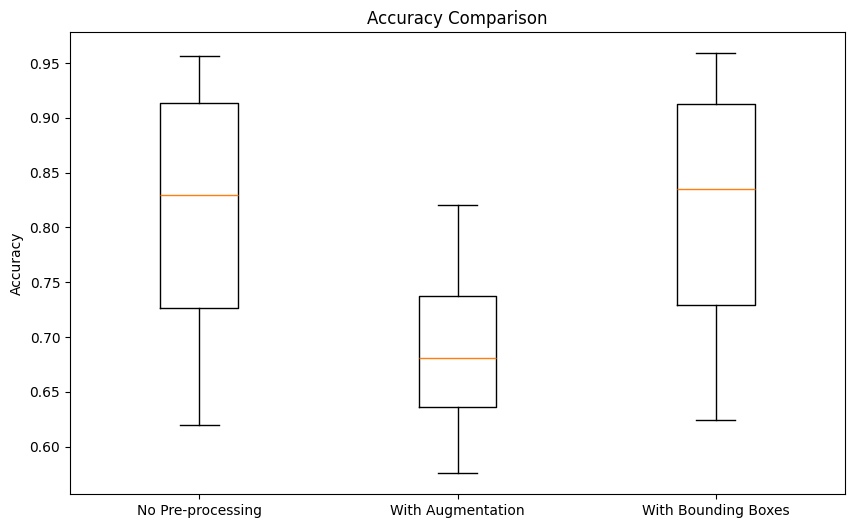

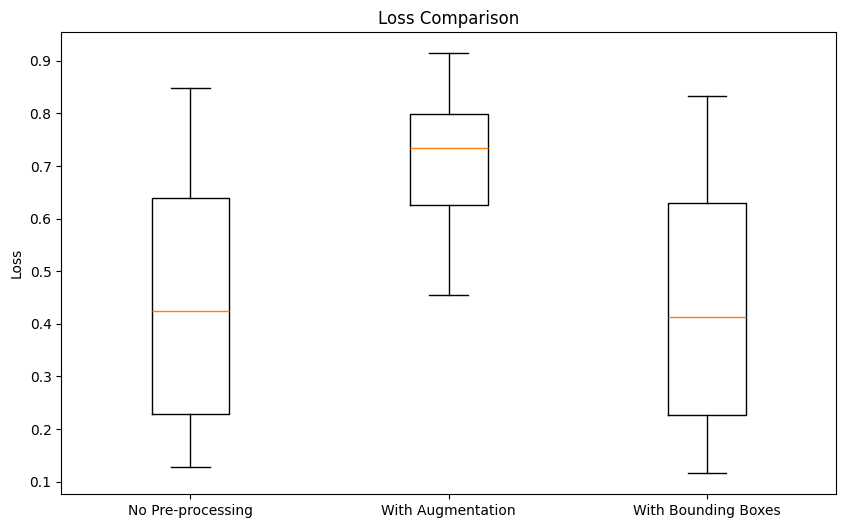

In [29]:
import matplotlib.pyplot as plt

# Accuracy and loss values for each model
accuracy_values = [
    [0.6194, 0.6781, 0.7157, 0.7577, 0.8055, 0.8537, 0.8899, 0.9214, 0.9439, 0.9567],
    [0.5758, 0.6154, 0.6318, 0.6493, 0.6731, 0.6882, 0.7118, 0.7460, 0.7812, 0.8201],
    [0.6245, 0.6826, 0.7189, 0.7597, 0.8122, 0.8579, 0.8927, 0.9193, 0.9428, 0.9589]
]

loss_values = [
    [0.8491, 0.7316, 0.6598, 0.5777, 0.4764, 0.3733, 0.2824, 0.2113, 0.1536, 0.1275],
    [0.9145, 0.8447, 0.8043, 0.7848, 0.7508, 0.7187, 0.6725, 0.6101, 0.5371, 0.4548],
    [0.8327, 0.7240, 0.6491, 0.5688, 0.4621, 0.3631, 0.2759, 0.2108, 0.1592, 0.1159]
]

# Plotting accuracy box plots
plt.figure(figsize=(10, 6))
plt.boxplot(accuracy_values, labels=['No Pre-processing', 'With Augmentation', 'With Bounding Boxes'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Plotting loss box plots
plt.figure(figsize=(10, 6))
plt.boxplot(loss_values, labels=['No Pre-processing', 'With Augmentation', 'With Bounding Boxes'])
plt.title('Loss Comparison')
plt.ylabel('Loss')
plt.show()


**Accuracy Comparison:**
- No Pre-processing: The accuracy starts at around 61.9% in the first epoch and gradually increases, reaching approximately 95.7% by the tenth epoch.

- With Augmentation: The accuracy starts at a lower point (around 57.6%) and shows a gradual increase, reaching about 82.0% by the tenth epoch. Augmentation might introduce more diversity in the training data, impacting the initial accuracy.

- With Bounding Boxes: The accuracy starts at a similar point to the no pre-processing case (around 62.5%), and the model achieves approximately 93.4% accuracy by the tenth epoch. The bounding box information appears to be beneficial to the model's learning.

**Loss Comparison:**
- No Pre-processing: The loss decreases steadily from the first epoch (0.8491) to the tenth epoch (0.1275), indicating that the model is learning and improving over time.

- With Augmentation: The loss values are higher compared to the no pre-processing case, but they still decrease over epochs. The final loss is 0.4226, reflecting some improvement.

- With Bounding Boxes: The loss follows a decreasing trend, starting at 0.8327 and reaching 0.1887 by the tenth epoch. This suggests that incorporating bounding box information aids the model in achieving a lower loss.

**Summary:**
- The model with no pre-processing achieves the highest accuracy, but it might benefit from additional techniques or adjustments to reach even higher performance.

- The augmented model, while starting with lower accuracy, shows improvement and might generalize better to unseen data due to data augmentation.

- The model with bounding boxes performs well, leveraging additional spatial information. It achieves high accuracy and a relatively low loss, indicating the effectiveness of incorporating bounding box data.

**Future Recommondations/Considerations:**
- Further analysis, such as validation set performance, testing on unseen data, and possibly fine-tuning the models for better generalization.